In [ ]:
# prompt: upload image

from google.colab import files
uploaded = files.upload()



Saving Lena_Image.png to Lena_Image.png


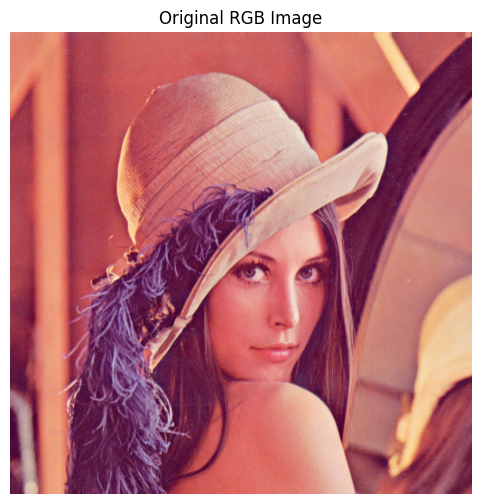

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set the image path (replace this with your uploaded image path)
image_path = "/content/Lena_Image.png"

# 1️⃣ Read the image (BGR to RGB)
image_bgr = cv2.imread(image_path)  # Read image in BGR format
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB

# 2️⃣ Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()


In [ ]:
# 3️⃣ Extract image size
height, width, channels = image_rgb.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

# 4️⃣ Calculate total pixels
total_pixels = width * height
print(f"Total Pixels: {total_pixels}")


Image Size: 512x512, Channels: 3
Total Pixels: 262144


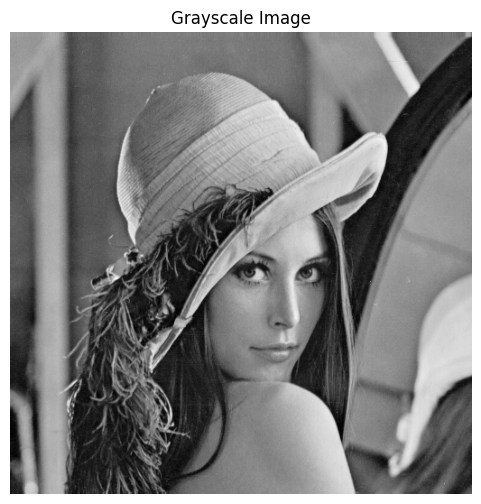

In [ ]:
# 5️⃣ Convert to Grayscale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite("/content/grayscale.jpg", image_gray)  # Save grayscale image

# Display Grayscale Image
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


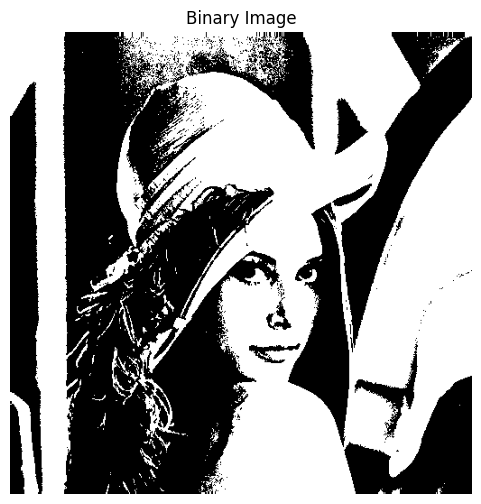

Black Pixels Count: 128178


In [ ]:
# 6️⃣ Convert to Binary using Thresholding
threshold = 127
_, binary_image = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite("/content/binary.jpg", binary_image)  # Save Binary Image

# Display Binary Image
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# Count black pixels (0 values)
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixels Count: {black_pixel_count}")


task 2.1

Sobel X:


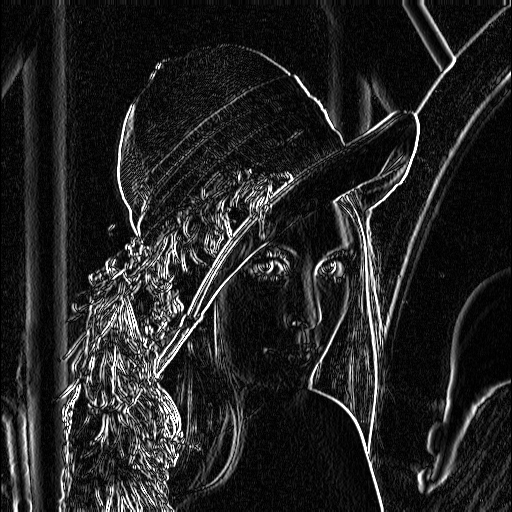

Sobel Y:


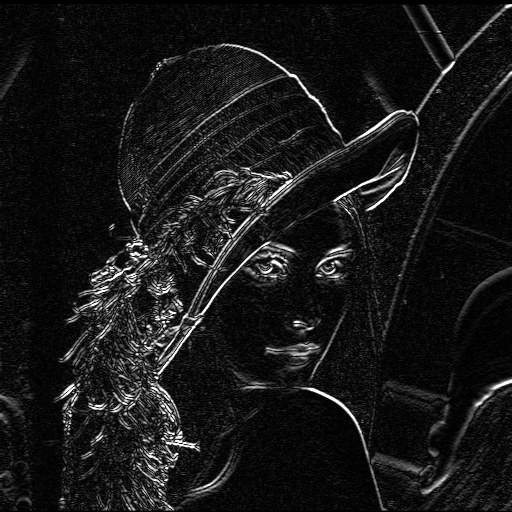

Combined Sobel Edge Detection:


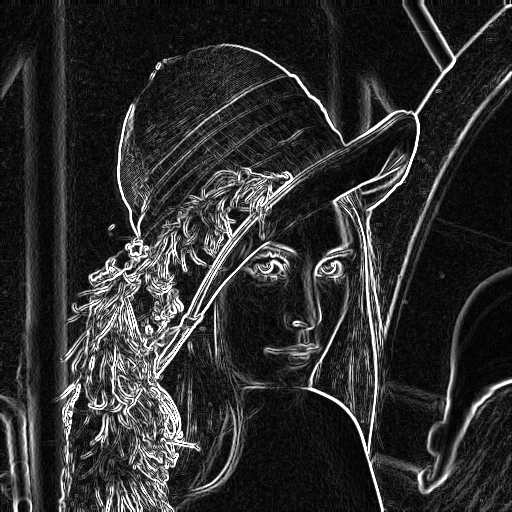

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1️⃣ Sobel X (Detects Vertical Edges)
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)  # Convert to uint8 for display

print("Sobel X:")
cv2_imshow(sobel_x_abs)

# 2️⃣ Sobel Y (Detects Horizontal Edges)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)  # Convert to uint8 for display

print("Sobel Y:")
cv2_imshow(sobel_y_abs)

# 3️⃣ Combined Sobel (Magnitude of X and Y)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Keep it in float format
sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert for display

print("Combined Sobel Edge Detection:")
cv2_imshow(sobel_combined)


Prewitt X Edge Detection:


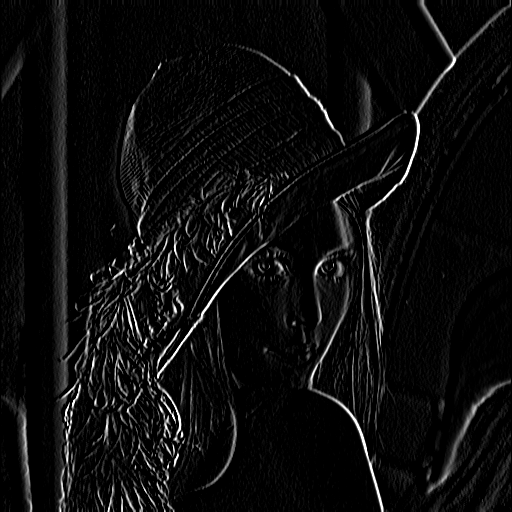

Prewitt Y Edge Detection:


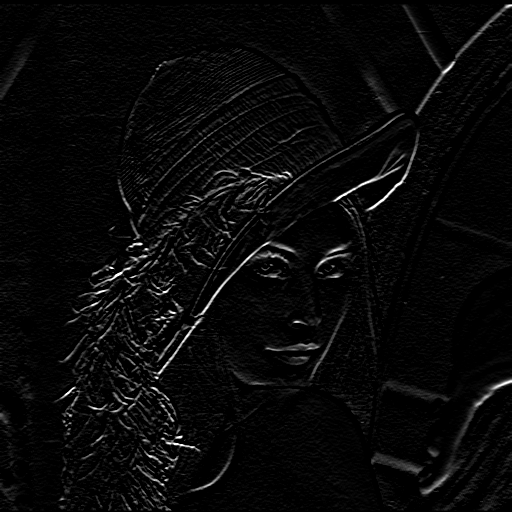

Combined Prewitt Edge Detection:


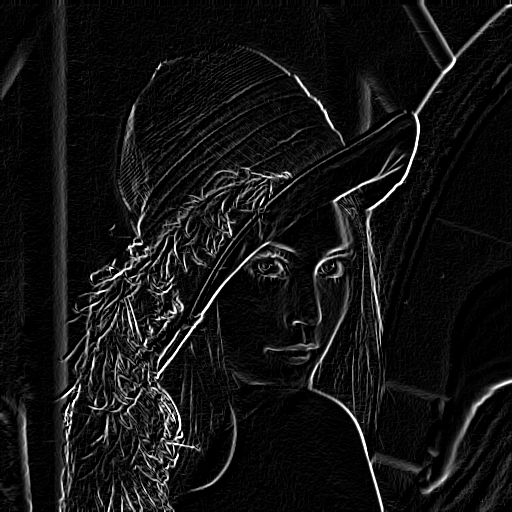

In [25]:
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

edge_x = cv2.filter2D(image_gray, -1, prewitt_x)
edge_y = cv2.filter2D(image_gray, -1, prewitt_y)


prewitt_combined = cv2.magnitude(edge_x.astype(float), edge_y.astype(float))
prewitt_combined = cv2.convertScaleAbs(prewitt_combined)

print("Prewitt X Edge Detection:")
cv2_imshow(edge_x)

print("Prewitt Y Edge Detection:")
cv2_imshow(edge_y)

print("Combined Prewitt Edge Detection:")
cv2_imshow(prewitt_combined)

Roberts Cross X Edge Detection:


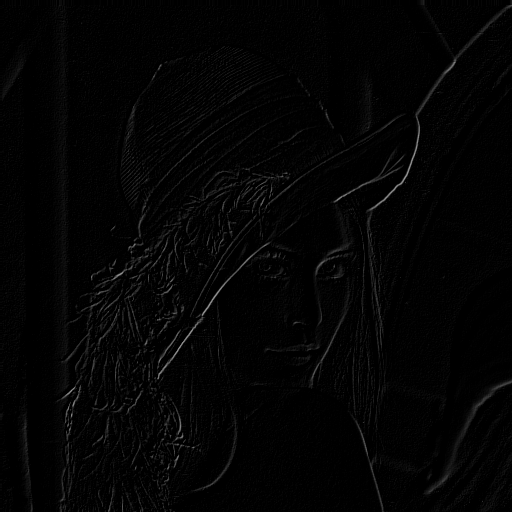

Roberts Cross Y Edge Detection:


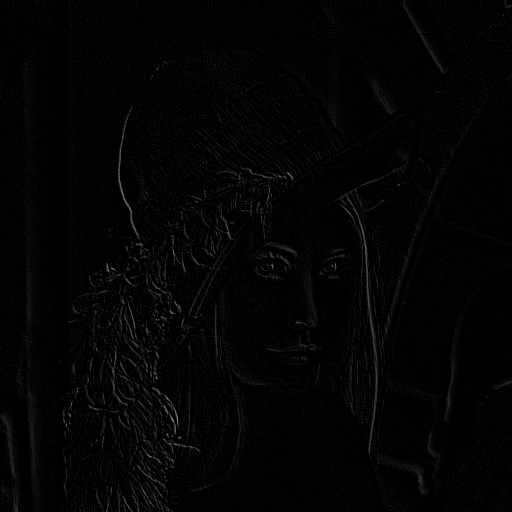

Combined Roberts Cross Edge Detection:


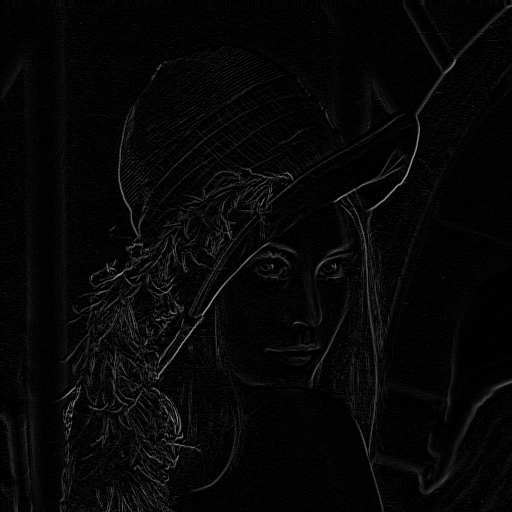

In [26]:
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])

edge_x = cv2.filter2D(image_gray, -1, roberts_cross_x)
edge_y = cv2.filter2D(image_gray, -1, roberts_cross_y)

roberts_combined = cv2.magnitude(edge_x.astype(float), edge_y.astype(float))
roberts_combined = cv2.convertScaleAbs(roberts_combined)

print("Roberts Cross X Edge Detection:")
cv2_imshow(edge_x)

print("Roberts Cross Y Edge Detection:")
cv2_imshow(edge_y)

print("Combined Roberts Cross Edge Detection:")
cv2_imshow(roberts_combined)

Canny Edge Detection:


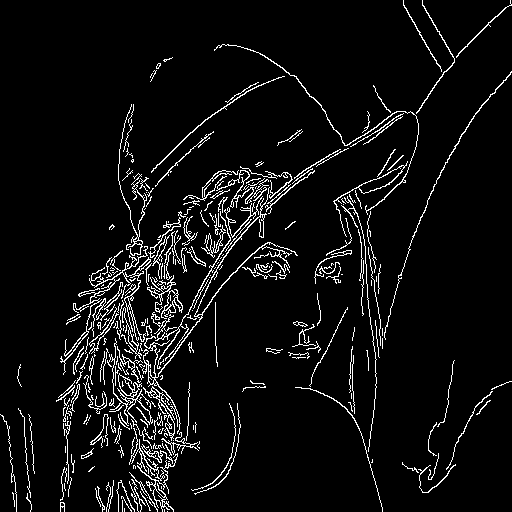

Sobel X Edge Detection:


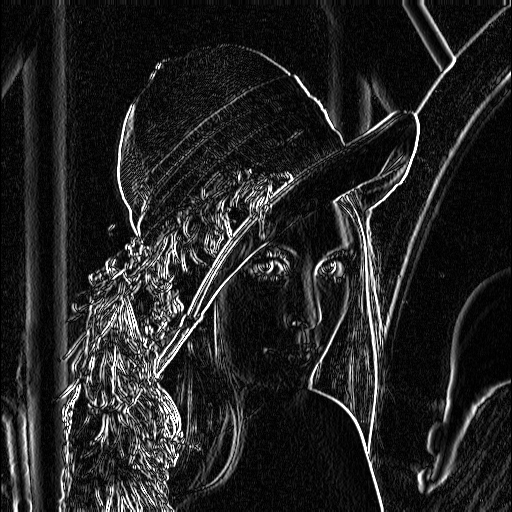

Sobel Y Edge Detection:


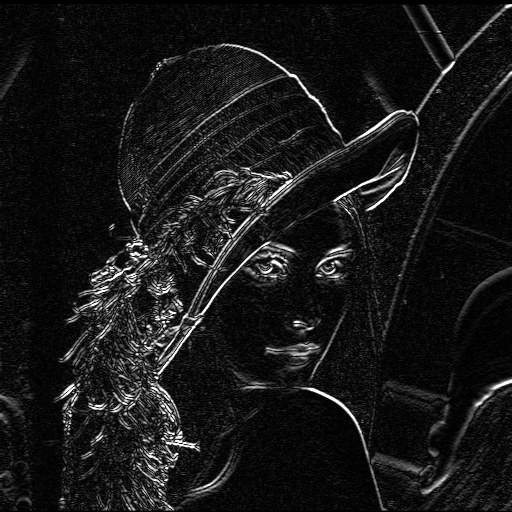

Combined Sobel Edge Detection (Magnitude):


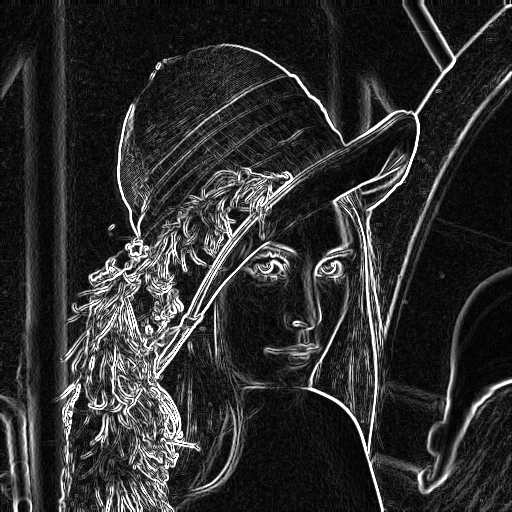

In [27]:
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

edges_combined = cv2.magnitude(sobel_x, sobel_y)
edges_combined = cv2.convertScaleAbs(edges_combined)

edges_canny = cv2.Canny(image_gray, 100, 200)

print("Canny Edge Detection:")
cv2_imshow(edges_canny)

print("Sobel X Edge Detection:")
cv2_imshow(cv2.convertScaleAbs(sobel_x))

print("Sobel Y Edge Detection:")
cv2_imshow(cv2.convertScaleAbs(sobel_y))

print("Combined Sobel Edge Detection (Magnitude):")
cv2_imshow(edges_combined)

task 2 .2

Global Thresholding - Sobel X Segmentation:


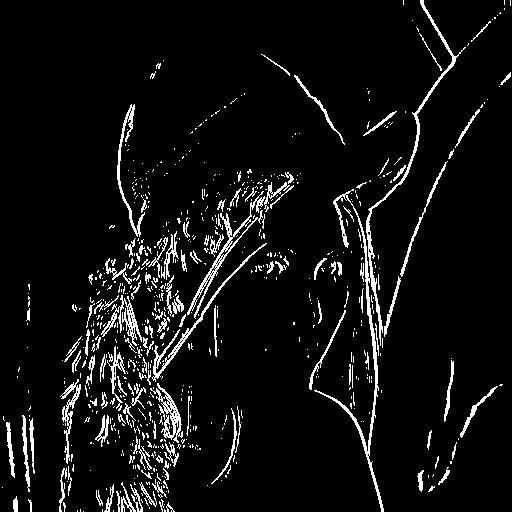

Global Thresholding - Sobel Y Segmentation:


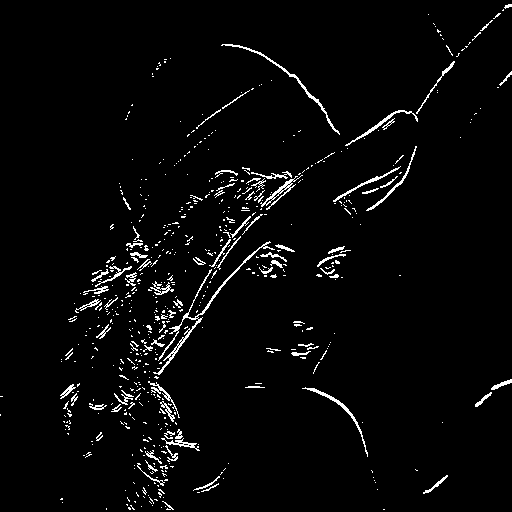

Global Thresholding - Combined Sobel Segmentation:


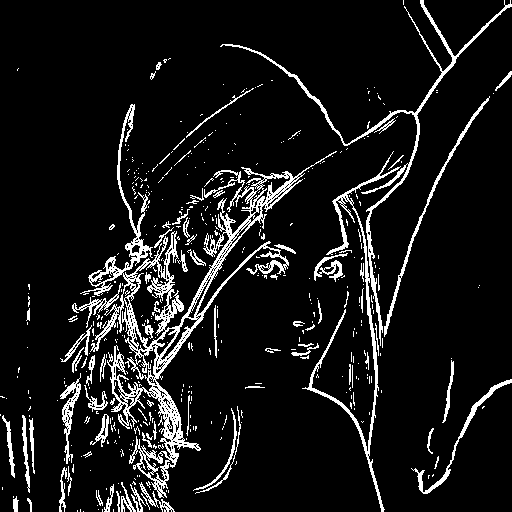

In [28]:
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

_, segmented_x = cv2.threshold(cv2.convertScaleAbs(sobel_x), 127, 255, cv2.THRESH_BINARY)
_, segmented_y = cv2.threshold(cv2.convertScaleAbs(sobel_y), 127, 255, cv2.THRESH_BINARY)
_, segmented_combined = cv2.threshold(sobel_combined, 127, 255, cv2.THRESH_BINARY)

print("Global Thresholding - Sobel X Segmentation:")
cv2_imshow(segmented_x)

print("Global Thresholding - Sobel Y Segmentation:")
cv2_imshow(segmented_y)

print("Global Thresholding - Combined Sobel Segmentation:")
cv2_imshow(segmented_combined)

Adaptive Thresholding - Sobel X Segmentation:


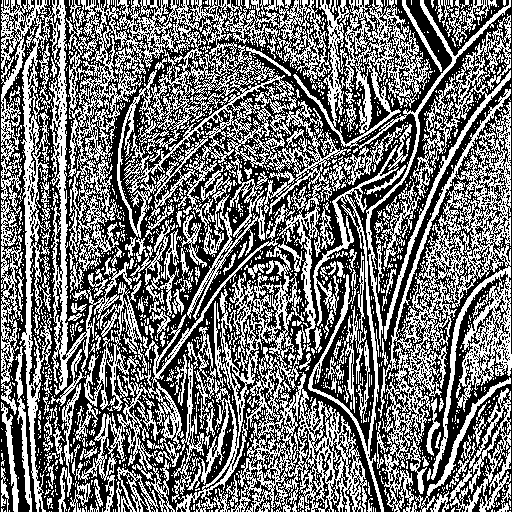

Adaptive Thresholding - Sobel Y Segmentation:


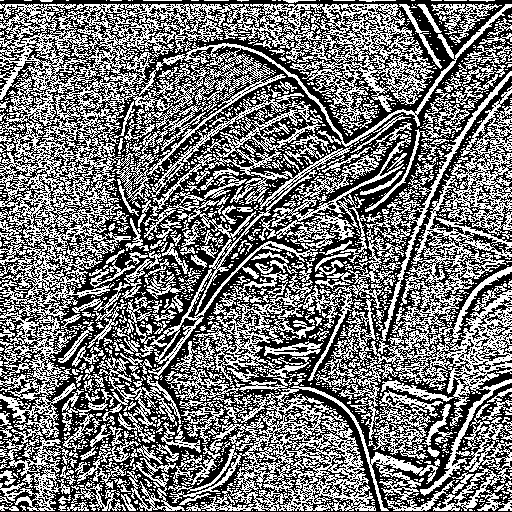

Adaptive Thresholding - Combined Sobel Segmentation:


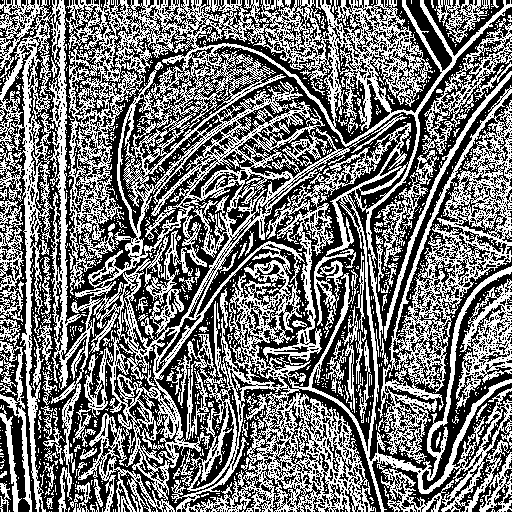

In [29]:
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

adaptive_x = cv2.adaptiveThreshold(cv2.convertScaleAbs(sobel_x), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_y = cv2.adaptiveThreshold(cv2.convertScaleAbs(sobel_y), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_combined = cv2.adaptiveThreshold(sobel_combined, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

print("Adaptive Thresholding - Sobel X Segmentation:")
cv2_imshow(adaptive_x)

print("Adaptive Thresholding - Sobel Y Segmentation:")
cv2_imshow(adaptive_y)

print("Adaptive Thresholding - Combined Sobel Segmentation:")
cv2_imshow(adaptive_combined)

Canny Edge Detection - Sobel X Segmentation:


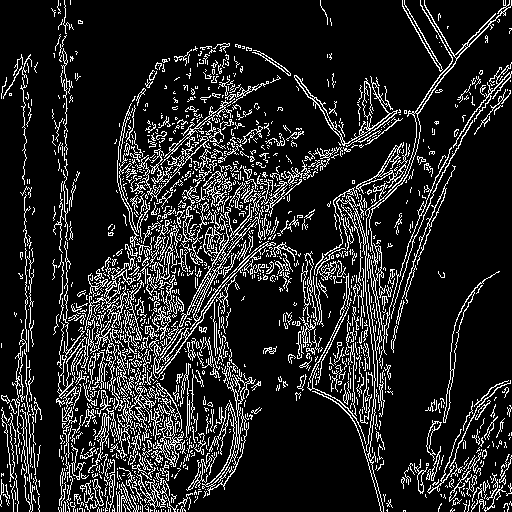

Canny Edge Detection - Sobel Y Segmentation:


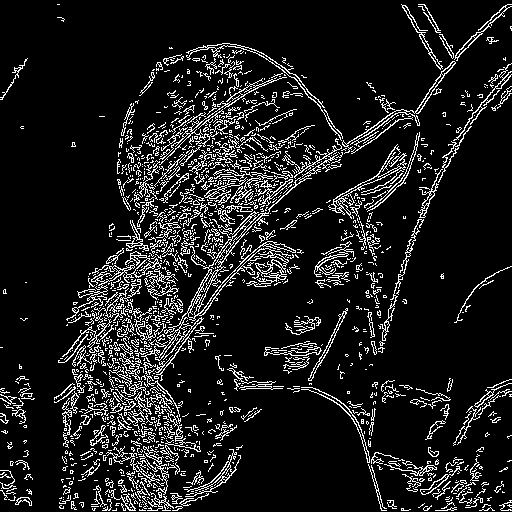

Canny Edge Detection - Combined Sobel Segmentation:


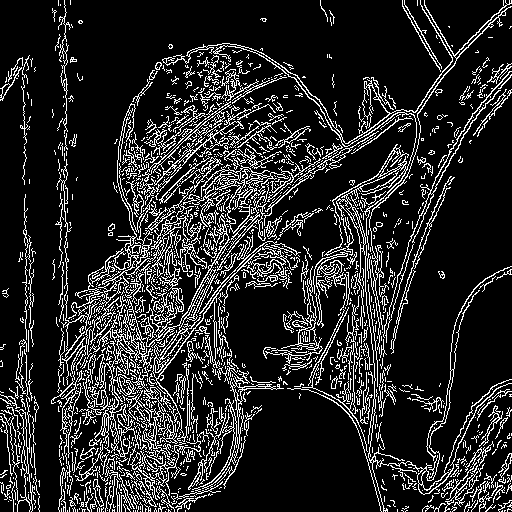

In [30]:
# Apply Sobel operators for X and Y directions
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the Sobel X and Y results (magnitude)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

    # Apply Canny Edge Detection to the Sobel X, Sobel Y, and Combined results
edges_x = cv2.Canny(cv2.convertScaleAbs(sobel_x), 100, 200)
edges_y = cv2.Canny(cv2.convertScaleAbs(sobel_y), 100, 200)
edges_combined = cv2.Canny(sobel_combined, 100, 200)

    # Display the results
print("Canny Edge Detection - Sobel X Segmentation:")
cv2_imshow(edges_x)
print("Canny Edge Detection - Sobel Y Segmentation:")
cv2_imshow(edges_y)

print("Canny Edge Detection - Combined Sobel Segmentation:")
cv2_imshow(edges_combined)

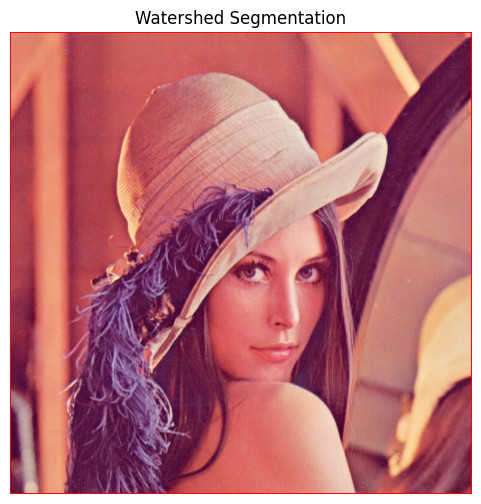

In [32]:
# Apply Watershed
image_rgb_copy = image_rgb.copy()
markers = cv2.watershed(image_rgb_copy, markers)
image_rgb_copy[markers == -1] = [255, 0, 0]  # Mark boundaries

plt.figure(figsize=(6, 6))
plt.imshow(image_rgb_copy)
plt.title("Watershed Segmentation")
plt.axis("off")
plt.show()
